In [ ]:
#resampling, normalzing, z-scoring, making efields, plot intensities

In [1]:
import nilearn
from nilearn.image import resample_to_img
import os
import nibabel as nib
import numpy as np
import pandas as pd
import shutil
import seaborn as sns
import matplotlib.pyplot as plt
from nilearn.image import binarize_img
from nilearn.image import load_img
from nilearn.image import math_img

In [19]:
#resample all subjects to allen brain
files = os.listdir('/Volumes/Cingulate/AADC/Segmentations')
allen = load_img('/Users/jp1590/Documents/MATLAB/leaddbs/templates/space/MNI152NLin2009bAsym/labeling/Allen Brain Atlas (Ding 2020).nii')
for i in files:
    if i.startswith('.DS'):
        print()
    else:
        sub = load_img(f'/Volumes/Cingulate/AADC/All_Seg/{i}_bi_binarized.nii.gz')
        sub_re = resample_to_img(sub,allen)
        nib.save(sub_re,f'/Volumes/Cingulate/AADC/All_Seg/resample/{i}_bi_binarized.nii.gz')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/nilearn/image/resampling.py:294: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/nilearn/image/resampling.py:294: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/nilearn/image/resampling.py:294: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/nilearn/

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/nilearn/image/resampling.py:294: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/nilearn/image/resampling.py:294: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/nilearn/image/resampling.py:294: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/nilearn/

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/nilearn/image/resampling.py:294: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn(


In [3]:
files = os.listdir('/Volumes/Cingulate/AADC/new sub/Segmentations')
#normalize
for i in files:
    sub_half = load_img(f'/Volumes/Cingulate/AADC/new sub/Segmentations/{i}/{i}_ses-postop_space-anchorNative_desc-preproc_acq-ax_MRI cropped.nii')
    sub_full = load_img(f'/Volumes/Cingulate/AADC/new sub/Segmentations/{i}/{i}_ses-postop_space-anchorNative_desc-preproc_acq-cor_MRI cropped.nii')
    sub_half_array = sub_half.get_fdata()
    sub_full_array = sub_full.get_fdata()
    sub_half_norm = (sub_half_array - sub_half_array.min()) / (sub_half_array.max() - sub_half_array.min())
    sub_full_norm = (sub_full_array - sub_full_array.min()) / (sub_full_array.max() - sub_full_array.min())
    new_image_half = nib.Nifti1Image(sub_half_norm, affine=sub_half.affine)
    new_image_full = nib.Nifti1Image(sub_full_norm, affine=sub_full.affine)
    nib.save(new_image_half,f'/Volumes/Cingulate/AADC/new sub/Segmentations/{i}/{i}_uni_normalized.nii')
    nib.save(new_image_full,f'/Volumes/Cingulate/AADC/new sub/Segmentations/{i}/{i}_bi_normalized.nii')
    
#binarize
for i in files:
    threshold_half = math_img('img > 0.4', img=new_image_half)
    threshold_full = math_img('img > 0.4', img=new_image_full)
    threshold_half.to_filename(f'/Volumes/Cingulate/AADC/new sub/Segmentations/{i}/{i}_uni_binarized.nii')
    threshold_full.to_filename(f'/Volumes/Cingulate/AADC/new sub/Segmentations/{i}/{i}_bi_binarized.nii')
    
#efield
for i in files:
    masked_half_data = math_img('img1*img2',img1=new_image_half,img2=threshold_half)
    masked_full_data = math_img('img1*img2',img1=new_image_full,img2=threshold_full)
    nib.save(masked_half_data,f'/Volumes/Cingulate/AADC/new sub/Segmentations/{i}/{i}_uni_efield.nii')
    nib.save(masked_full_data,f'/Volumes/Cingulate/AADC/new sub/Segmentations/{i}/{i}_bi_efield.nii')

In [29]:
#normalize 0 to 1
files = os.listdir('/Volumes/Cingulate/AADC/normalized')
for i in files:
    if os.path.exists(f'/Volumes/Cingulate/AADC/normalized/{i}/crop/glpostop_tra_right_cropped.nii'):
        aadc_sub = load_img(f'/Volumes/Cingulate/AADC/normalized/{i}/crop/glpostop_tra_right_cropped.nii')
        aadc_array = aadc_sub.get_fdata()
        aadc_norm = (aadc_array - aadc_array.min()) / (aadc_array.max() - aadc_array.min())
        new_image_aadc = nib.Nifti1Image(aadc_norm, affine=aadc_sub.affine)
        nib.save(new_image_aadc,f'/Volumes/Cingulate/AADC/normalized/{i}/binary/{i}_right_normalized.nii')

for i in files:
    if os.path.exists(f'/Volumes/Cingulate/AADC/normalized/{i}/crop/glpostop_tra_left_cropped.nii'):
        aadc_sub = load_img(f'/Volumes/Cingulate/AADC/normalized/{i}/crop/glpostop_tra_left_cropped.nii')
        aadc_array = aadc_sub.get_fdata()
        aadc_norm = (aadc_array - aadc_array.min()) / (aadc_array.max() - aadc_array.min())
        new_image_aadc = nib.Nifti1Image(aadc_norm, affine=aadc_sub.affine)
        nib.save(new_image_aadc,f'/Volumes/Cingulate/AADC/normalized/{i}/binary/{i}_left_normalized.nii')

for i in files:
    if os.path.exists(f'/Volumes/Cingulate/AADC/normalized/{i}/crop/glpostop_tra_bi_cropped.nii'):
        aadc_sub = load_img(f'/Volumes/Cingulate/AADC/normalized/{i}/crop/glpostop_tra_bi_cropped.nii')
        aadc_array = aadc_sub.get_fdata()
        aadc_norm = (aadc_array - aadc_array.min()) / (aadc_array.max() - aadc_array.min())
        new_image_aadc = nib.Nifti1Image(aadc_norm, affine=aadc_sub.affine)
        nib.save(new_image_aadc,f'/Volumes/Cingulate/AADC/normalized/{i}/binary/{i}_bi_normalized.nii')

In [160]:
#z-scoring
for i in files:
    if os.path.exists(f'/Volumes/Cingulate/AADC/normalized/{i}/crop/glpostop_tra_left_cropped.nii'):
        z_sub = load_img(f'/Volumes/Cingulate/AADC/normalized/{i}/crop/glpostop_tra_left_cropped.nii')
        z_array = z_sub.get_fdata()
        z_norm = (z_array - z_array.mean()) / (z_array.std())
        new_z = nib.Nifti1Image(z_norm,affine=z_sub.affine)
        new_z.to_filename(f'/Volumes/Cingulate/AADC/normalized/{i}/{i}_left_z_scoring.nii')
        
for i in files:
    if os.path.exists(f'/Volumes/Cingulate/AADC/normalized/{i}/crop/glpostop_tra_right_cropped.nii'):
        z_sub = load_img(f'/Volumes/Cingulate/AADC/normalized/{i}/crop/glpostop_tra_right_cropped.nii')
        z_array = z_sub.get_fdata()
        z_norm = (z_array - z_array.mean()) / (z_array.std())
        new_z = nib.Nifti1Image(z_norm,affine=z_sub.affine)
        new_z.to_filename(f'/Volumes/Cingulate/AADC/normalized/{i}/{i}_right_z_scoring.nii')
        
for i in files:
    if os.path.exists(f'/Volumes/Cingulate/AADC/normalized/{i}/crop/glpostop_tra_bi_cropped.nii'):
        z_sub = load_img(f'/Volumes/Cingulate/AADC/normalized/{i}/crop/glpostop_tra_bi_cropped.nii')
        z_array = z_sub.get_fdata()
        z_norm = (z_array - z_array.mean()) / (z_array.std())
        new_z = nib.Nifti1Image(z_norm,affine=z_sub.affine)
        new_z.to_filename(f'/Volumes/Cingulate/AADC/normalized/{i}/{i}_bi_z_scoring.nii')

In [18]:
#resample normalized files to allen atlas
allen = load_img('/Users/jp1590/Documents/MATLAB/leaddbs/templates/space/MNI152NLin2009bAsym/labeling/Allen Brain Atlas (Ding 2020).nii')
for i in seg:
    if os.path.exists(f'/Volumes/Cingulate/AADC/Segmentations/{i}/normalized_z/{i}_bi_normalized.nii'):
        sub = nib.load(f'/Volumes/Cingulate/AADC/Segmentations/{i}/normalized_z/{i}_bi_normalized.nii')
        sub_re = resample_to_img(sub,allen)
        nib.save(sub_re,f'/Volumes/Cingulate/AADC/resample/{i}_bi_normalized.nii')
        
    if os.path.exists(f'/Volumes/Cingulate/AADC/Segmentations/{i}/normalized_z/{i}_right_normalized.nii'):
        sub = load_img(f'/Volumes/Cingulate/AADC/Segmentations/{i}/normalized_z/{i}_right_normalized.nii')
        sub_re = resample_to_img(sub,allen)
        nib.save(sub_re,f'/Volumes/Cingulate/AADC/resample/{i}_right_normalized_efield.nii')
        
    if os.path.exists(f'/Volumes/Cingulate/AADC/Segmentations/{i}/normalized_z/{i}_left_normalized.nii'):
        sub = load_img(f'/Volumes/Cingulate/AADC/Segmentations/{i}/normalized_z/{i}_left_normalized.nii')
        sub_re = resample_to_img(sub,allen)
        nib.save(sub_re,f'/Volumes/Cingulate/AADC/resample/{i}_left_normalized_efield.nii')

In [30]:
#binarize
for i in files:
    if os.path.exists(f'/Volumes/Cingulate/AADC/normalized/{i}/binary/{i}_left_normalized.nii'):
        aadc_norm_sub = load_img(f'/Volumes/Cingulate/AADC/normalized/{i}/binary/{i}_left_normalized.nii')
        threshold = math_img('img > 0.4', img=aadc_norm_sub)
        threshold.to_filename(f'/Volumes/Cingulate/AADC/normalized/{i}/binary/{i}_left_binarized.nii')
        
for i in files:
    if os.path.exists(f'/Volumes/Cingulate/AADC/normalized/{i}/binary/{i}_right_normalized.nii'):
        aadc_norm_sub = load_img(f'/Volumes/Cingulate/AADC/normalized/{i}/binary/{i}_right_normalized.nii')
        threshold = math_img('img > 0.4', img=aadc_norm_sub)
        threshold.to_filename(f'/Volumes/Cingulate/AADC/normalized/{i}/binary/{i}_right_binarized.nii')
        
for i in files:
    if os.path.exists(f'/Volumes/Cingulate/AADC/normalized/{i}/binary/{i}_bi_normalized.nii'):
        aadc_norm_sub = load_img(f'/Volumes/Cingulate/AADC/normalized/{i}/binary/{i}_bi_normalized.nii')
        threshold = math_img('img > 0.4', img=aadc_norm_sub)
        threshold.to_filename(f'/Volumes/Cingulate/AADC/normalized/{i}/binary/{i}_bi_binarized.nii')

In [22]:
#generate efield from binary mask
seg = os.listdir('/Volumes/Cingulate/AADC/Segmentations')
for i in seg:
    if os.path.exists(f'/Volumes/Cingulate/AADC/resample/{i}_bi_normalized.nii'):
        mask = nib.load(f'/Volumes/Cingulate/AADC/All_Seg/{i}_bi_binarized.nii.gz')
        sub = load_img(f'/Volumes/Cingulate/AADC/resample/{i}_bi_normalized.nii')
        masked_data = math_img('img1*img2',img1=sub,img2=mask)
        nib.save(masked_data,f'/Volumes/Cingulate/AADC/Segmentations/{i}/efield/{i}_bi_normalized_efield.nii')

for i in seg:
    if os.path.exists(f'/Volumes/Cingulate/AADC/resample/{i}_right_normalized_efield.nii'):
        mask = nib.load(f'/Volumes/Cingulate/AADC/All_Seg/{i}_bi_binarized.nii.gz')
        sub = load_img(f'/Volumes/Cingulate/AADC/resample/{i}_right_normalized_efield.nii')
        masked_data = math_img('img1*img2',img1=sub,img2=mask)
        nib.save(masked_data,f'/Volumes/Cingulate/AADC/Segmentations/{i}/efield/{i}_right_normalized_efield.nii')
        
for i in seg:
    if os.path.exists(f'/Volumes/Cingulate/AADC/resample/{i}_left_normalized_efield.nii'):
        mask = nib.load(f'/Volumes/Cingulate/AADC/All_Seg/{i}_bi_binarized.nii.gz')
        sub = load_img(f'/Volumes/Cingulate/AADC/resample/{i}_left_normalized_efield.nii')
        masked_data = math_img('img1*img2',img1=sub,img2=mask)
        nib.save(masked_data,f'/Volumes/Cingulate/AADC/Segmentations/{i}/efield/{i}_left_normalized_efield.nii')

Text(0.5, 0, 'Intensity')

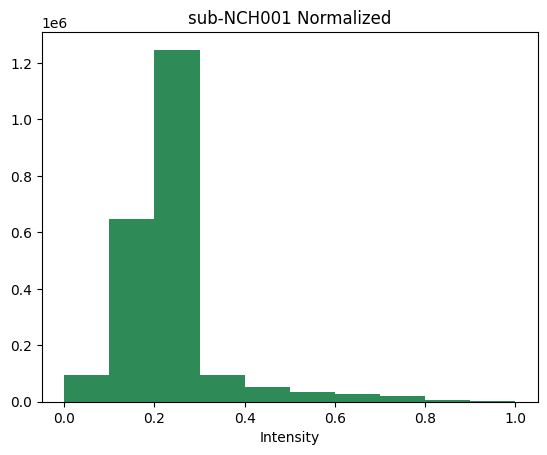

In [39]:
#histogram plot of normalized values for NCH001
norm = load_img('/Volumes/Cingulate/AADC/Segmentations/NCH001/normalized_z/NCH001_bi_normalized.nii')
norm_array = norm.get_fdata()
norm_flat = norm_array.flatten()
norm_0 = norm_flat[norm_flat !=0]
plt.hist(norm_flat,bins=10,color='seagreen')
plt.title('sub-NCH001 Normalized')
plt.xlabel('Intensity')

Text(0.5, 0, 'Intensity')

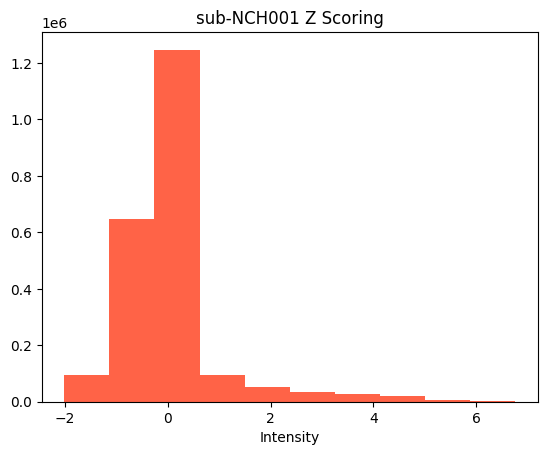

In [90]:
#histogram plot of z_scored values for NCH001
z = load_img('/Volumes/Cingulate/AADC/Segmentations/NCH001/normalized_z/NCH001_bi_z_scoring.nii')
z_array = z.get_fdata()
z_flat = z_array.flatten()
z_0 = z_flat[z_flat !=0]
plt.hist(z_flat,bins=10,color='tomato')
plt.title('sub-NCH001 Z Scoring')
plt.xlabel('Intensity')

Text(0.5, 0, 'Intensity')

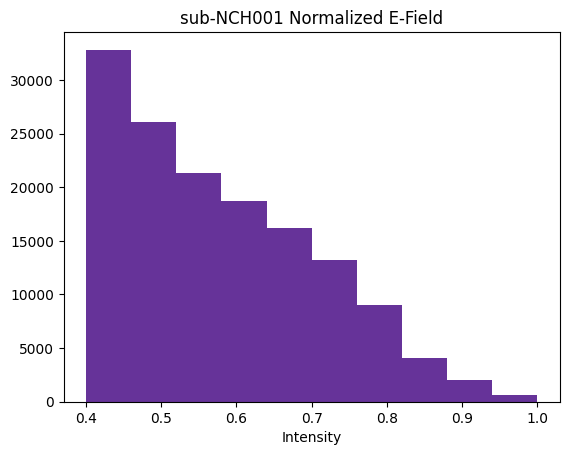

In [83]:
#histogram plot of normalized efield values for NCH001
scan = load_img('/Volumes/Cingulate/AADC/Segmentations/NCH001/efield/NCH001_bi_normalized_efield.nii')
scan_array = scan.get_fdata()
scan_flat = scan_array.flatten()
no_0 = scan_flat[scan_flat != 0]
plt.hist(no_0,bins=10,color='rebeccapurple')
plt.title('sub-NCH001 Normalized E-Field')
plt.xlabel('Intensity')

Text(0.5, 0, 'Intensity')

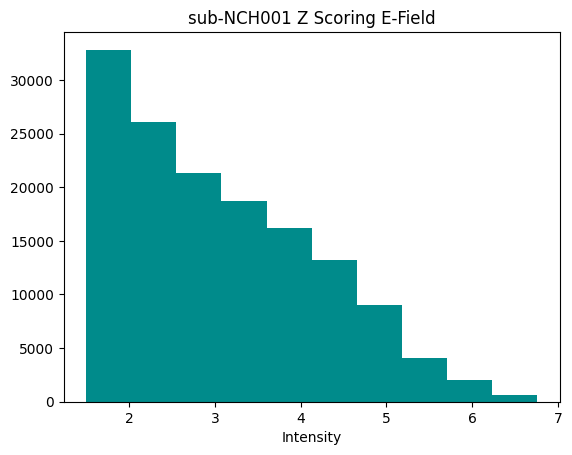

In [87]:
#histogram plot of z_scored efield values for NCH001
z_efield = load_img('/Volumes/Cingulate/AADC/Segmentations/NCH001/efield/NCH001_left_z_scoring_efield.nii')
z_efield_array = z_efield.get_fdata()
z_efield_flat = z_efield_array.flatten()
no_z_efield_0 = z_efield_flat[z_efield_flat != 0]
plt.hist(no_z_efield_0,color='darkcyan')
plt.title('sub-NCH001 Z Scoring E-Field')
plt.xlabel('Intensity')

Text(0.5, 0, 'Intensity')

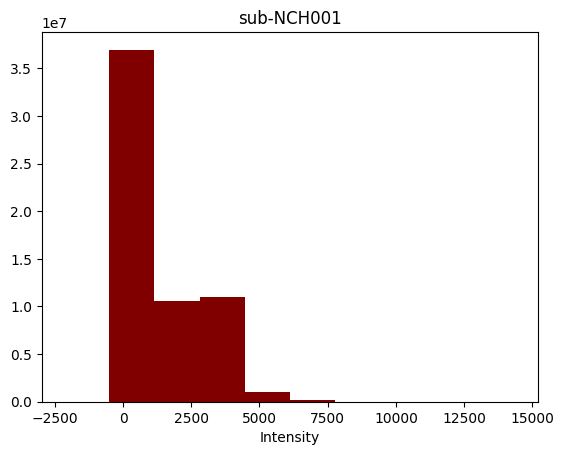

In [57]:
#histogram plot of original values for NCH001
original = load_img('/Volumes/Cingulate/AADC/Segmentations/NCH001/original/glpostop_tra_left.nii')
original_array = original.get_fdata()
original_flat = original_array.flatten()
no_original_0 = original_flat[original_flat != 0]
plt.hist(no_original_0,color='maroon')
plt.title('sub-NCH001')
plt.xlabel('Intensity')

Text(0.5, 0, 'Intensity')

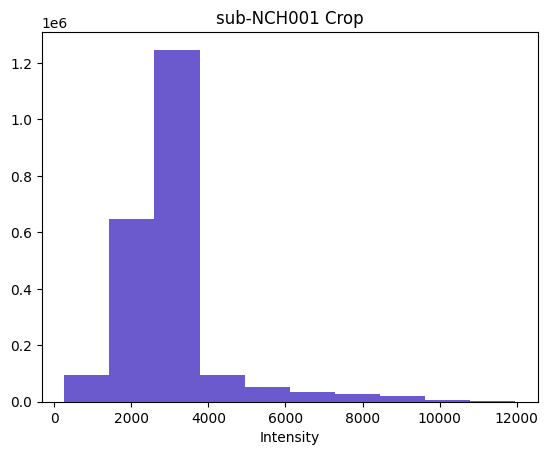

In [41]:
#histogram plot of original cropped values for NCH001
crop = load_img('/Volumes/Cingulate/AADC/Segmentations/NCH001/original/glpostop_tra_left_cropped.nii')
crop_array = crop.get_fdata()
crop_flat = crop_array.flatten()
no_crop_0 = crop_flat[crop_flat != 0]
plt.hist(no_crop_0,color='slateblue')
plt.title('sub-NCH001 Crop')
plt.xlabel('Intensity')